[Volver al Índice](https://drive.google.com/file/d/1PTrZfdMxkR8IQYFSRHXJEWdQ3qpe4qm4/view?usp=sharing)  🏠


---



In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.15.0'

In [3]:
import math
import tensorflow_datasets as tfds
import tensorflow_decision_forests as tfdf

In [6]:
import time
import numpy as np
import datetime
import zoneinfo
import matplotlib.pyplot as plt


In [7]:
#Funcion de normalizacion para los datos (Pasar valor de los pixeles de 0-255 a 0-1)
#Hace que la red aprenda mejor y mas rapido
def normalizar(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /= 255 #Aqui lo pasa de 0-255 a 0-1
  return imagenes, etiquetas

In [8]:
#Descargar set de datos de MNIST (Numeros escritos a mano, etiquetados)
datos, metadatos = tfds.load('mnist', as_supervised=True, with_info=True)

#Obtenemos en variables separadas los datos de entrenamiento (60k) y pruebas (10k)
datos_entrenamiento, datos_pruebas = datos['train'], datos['test']

#Etiquetas de las 10 categorias posibles (simplemente son los numeros del 0 al 9)
nombres_clases = metadatos.features['label'].names

#Normalizar los datos de entrenamiento y pruebas con la funcion que hicimos
datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

#Agregar a cache (usar memoria en lugar de disco, entrenamiento mas rapido)
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()

In [9]:
#Crear el modelo
modeloCNN = tf.keras.Sequential([

  tf.keras.layers.Input(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu' ),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) #Para redes de clasificacion
])

In [10]:
#Compilar el modelo
modeloCNN.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)


In [11]:
#Los numeros de datos en entrenamiento y pruebas (60k y 10k)
num_ej_entrenamiento = metadatos.splits["train"].num_examples
num_ej_pruebas = metadatos.splits["test"].num_examples

#El trabajo por lotes permite que entrenamientos con gran cantidad de datos se haga de manera mas eficiente
TAMANO_LOTE = 32

#Shuffle y repeat hacen que los datos esten mezclados de manera aleatoria para que la red
#no se vaya a aprender el orden de las cosas
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_ej_entrenamiento).batch(TAMANO_LOTE)
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)

In [13]:
# Tiempo estimado 20 mins (CPU), 3 mins (GPU)
%time historial2 = modeloCNN.fit(datos_entrenamiento, epochs=20, steps_per_epoch= math.ceil(num_ej_entrenamiento/TAMANO_LOTE))

Epoch 1/20
1875/1875 [==============================] - 24s 10ms/step - loss: 0.2748 - accuracy: 0.9134
Epoch 2/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1116 - accuracy: 0.9677
Epoch 3/20
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0879 - accuracy: 0.9742
Epoch 4/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0770 - accuracy: 0.9778
Epoch 5/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0740 - accuracy: 0.9785
Epoch 6/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0653 - accuracy: 0.9815
Epoch 7/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0680 - accuracy: 0.9807
Epoch 8/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0749 - accuracy: 0.9804
Epoch 9/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0970 - accuracy: 0.9782
Epoch 10/20
1875/1875 [==============================] - 18s 10m

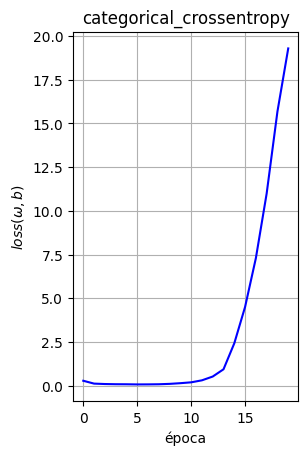

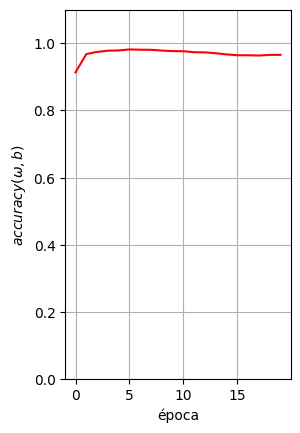

In [14]:
plt.subplot(1,2,1)
plt.plot(historial2.epoch,historial2.history['loss'], 'b',label='error')
plt.title(u'categorical_crossentropy')
plt.xlabel(u'época')
plt.ylabel(r'$loss(\omega, b)$')
plt.grid(True)
#plt.legend(loc='upper right')
plt.show()

plt.subplot(1,2,2)
plt.plot(historial2.epoch,historial2.history['accuracy'], 'r',label='precisión')
#plt.title(u'categorical_crossentropy')
plt.xlabel(u'época')
plt.ylabel(r'$accuracy(\omega, b)$')
plt.ylim([0,1.1])
plt.grid(True)
#plt.legend(loc='lower right')
plt.show()



---



---



#Exportar el modelo a TensorFlow.js

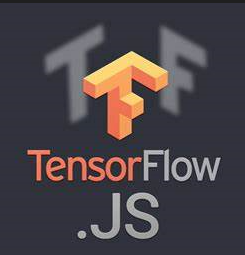

https://stackoverflow.com/questions/72672196/error-pips-dependency-resolver-does-not-currently-take-into-account-all-the-pa

In [15]:
#Exportar el modelo en formato h5
modeloCNN.save('numeros_CNN.h5')

/Users/ivana/IA-projects/mnist_intento2/nums/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
#Realizar la exportacion a la carpeta de salida
!tensorflowjs_converter --input_format=keras ./numeros_CNN.h5 ./carpeta_salida/cnn

/Users/ivana/IA-projects/mnist_intento2/nums/lib/python3.11/site-packages/tensorflow_hub/__init__.py:61: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import parse_version


In [ ]:
#Confirmar que en la carpeta de salida se hayan generado los archivos. Deben aparecer archivos "bin" y "json"
!ls -la carpeta_salida

total 660
drwxr-xr-x 2 root root   4096 Oct 15 18:16 .
drwxr-xr-x 1 root root   4096 Oct 15 18:16 ..
-rw-r--r-- 1 root root 655400 Oct 15 18:16 group1-shard1of1.bin
-rw-r--r-- 1 root root   5959 Oct 15 18:16 model.json




---



---



En la línea de comandos, en el directorio donde está el archivo **index.html** del proyecto



```
python -m http.server 8000
```



En el navegador



```
localhost:8000/index.html
```






---



---



#Ngrok

En una ventana de comandos, hay quw ejecutar



```
ngrok config add-authtoken $YOUR_AUTHTOKEN
```

y luego

```
ngrok http http://localhost:8000
```
Te va a dar una liga, que debes abrir con tu celular, para que se cargue el index.html






---


[Volver al Índice](https://drive.google.com/file/d/1PTrZfdMxkR8IQYFSRHXJEWdQ3qpe4qm4/view?usp=sharing)  🏠